In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
from sklearn.metrics import mean_squared_error
from statsmodels.stats.weightstats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [42]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

In [67]:
# load in all the different datasets

cal_2013 = pd.read_excel('cal_2013.xls')
tex_2013 = pd.read_excel('tex_2013.xls')
nj_2013 = pd.read_excel('nj_2013.xls')
ny_2013 = pd.read_excel('ny_2013.xls')
ny_2014 = pd.read_excel('ny_2014.xls')
penn_2013 = pd.read_excel('penn_2013.xls')

In [142]:
# Function takes a dataframe and list of features

def analysis(df, passed_features):
    
    # Cleaning data
    copy_df = df.copy()

    copy_df.columns = ['City', 'Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 
                  'Rape (revised definition)', 'Rape (legacy definition)', 'Robbery', 'Aggrevated assault', 
                  'Property Crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Arson']
    
    copy_df['Rape'] = copy_df['Rape (legacy definition)'].fillna(0) + copy_df['Rape (revised definition)'].fillna(0)
    copy_df = copy_df.drop(['Rape (legacy definition)', 'Rape (revised definition)'],axis=1)
    
    
    # format dataframe per capita
    per_cap = pd.DataFrame(copy_df['City'])
    for column in copy_df.columns[2:]:
        per_cap[column] = copy_df[column] / copy_df['Population']
    
        
    # initialize and fit model to dataframe
    linreg = LinearRegression()
        
    features = per_cap[passed_features]

    target = per_cap[['Property Crime']]

    linreg.fit(features, target)

    
    # print out initial scores
    print('intercept: ', linreg.intercept_)
    print('score: ', linreg.score(features, target))

    multi_df = pd.DataFrame(passed_features)                                                     

    multi_df.columns = ['Features']
    multi_df['Coef'] = linreg.coef_.reshape(-1,1)

    print(multi_df)
    print()
    print()
    
    # iterate over t-tests
    print('T-TESTS')
    for name in features[1:]:
        print(name)
        print(ttest_ind(per_cap[name], per_cap['Property Crime']))
        print()
        
    r_scores = []
    r_range = range(10,100,10)

    # iterate over cross validation
    print()
    print()
    print('CROSS VALIDATION')
    for i in r_range:

        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=(i/100))
        linreg.fit(features_train, target_train)
        target_pred = linreg.predict(features_test)


        score = cross_val_score(linreg, features, target, cv=i, scoring='neg_mean_squared_error')
        mse = -score
        rmse = np.sqrt(mse)


        print('iteration:', i/10)
        print('root mean squared error:', rmse.mean())
        linreg.fit(features_train, target_train)
        print('r squarred score:', linreg.score(features_test,target_test))
        print('Hold out percentage: {}%'.format(i))
        print()
        r_scores.append(rmse.mean())
        
    # create line plot to show model with least variance
    plt.plot(r_range, r_scores)
    plt.xlabel('Holdout Percentage')
    plt.ylabel('Cross Validation root-mean-squarred-error Score')
    plt.show()

    

intercept:  [-0.03204104]
score:  0.9444812910241124
        Features       Coef
0  Violent Crime  17.581698


T-TESTS
Violent Crime
(-3.289165519959095, 0.001042903349596027, 922.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.07288008622943931
r squarred score: -17.520757060691583
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.06363103533121428
r squarred score: 0.35221759537751773
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.05851205907796129
r squarred score: -5.929419072077093
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.05621375025999127
r squarred score: -6.3715148330490345
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.05367751063475258
r squarred score: -3.130809711643402
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.052516247952811526
r squarred score: 0.8890545347866501
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.0506644609406

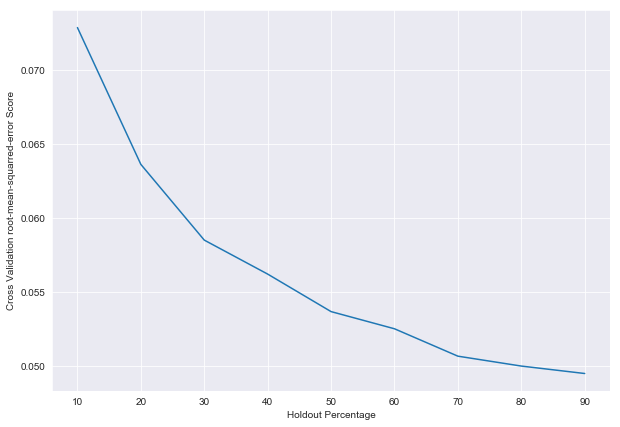

In [143]:
analysis(cal_2013, ['Violent Crime'])

intercept:  [0.01373691]
score:  0.2830175524894686
        Features      Coef
0  Violent Crime  3.745288


T-TESTS
Violent Crime
(-22.70514389515932, 8.912792885437256e-86, 694.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.012203199162645267
r squarred score: 0.07732420761016146
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.011971497059691447
r squarred score: 0.22255830829615042
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.011756286015734781
r squarred score: 0.4847529748899598
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.011531433006602162
r squarred score: 0.34329838514508915
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.011377260419589485
r squarred score: 0.2338055775203921
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.011254363351329018
r squarred score: 0.27244555478801913
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.011058899

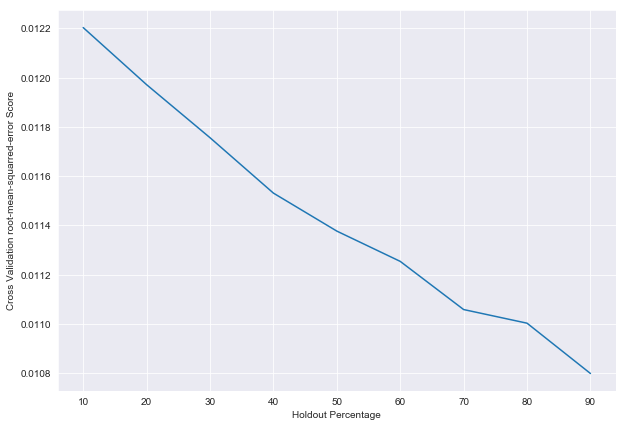

In [144]:
analysis(ny_2013, ['Violent Crime'])

intercept:  [0.01623375]
score:  0.25158003694594533
        Features     Coef
0  Violent Crime  3.91277


T-TESTS
Violent Crime
(-29.519216953846737, 1.3775877219705118e-144, 1206.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.017362224095560375
r squarred score: 0.33360172848639014
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.016833256381954882
r squarred score: 0.22909116212110936
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.016725693921332895
r squarred score: 0.1233302001032116
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.016422682919033205
r squarred score: 0.13876867556175632
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.016257111037483604
r squarred score: 0.21013095558100792
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.01592071404084709
r squarred score: 0.1722724449867652
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.0158536

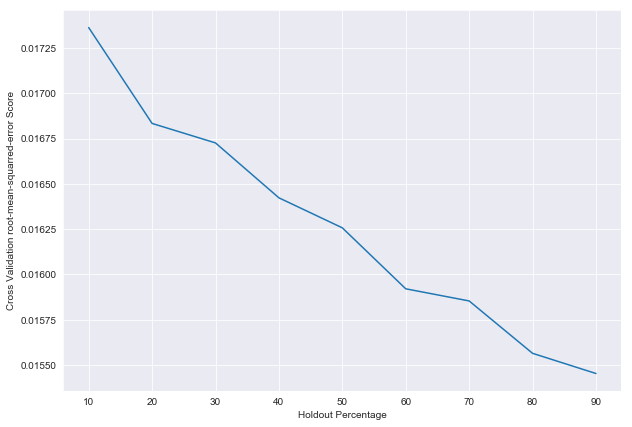

In [146]:
analysis(tex_2013, ['Violent Crime'])

intercept:  [0.01404374]
score:  0.15271613727210376
        Features      Coef
0  Violent Crime  3.865485


T-TESTS
Violent Crime
(-16.584020212330607, 1.7619375144558197e-54, 956.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.020025702626541013
r squarred score: 0.004785214618280853
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.018659948580125024
r squarred score: 0.20375911532209412
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.018204295571681836
r squarred score: 0.10302660713146172
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.016858759145125312
r squarred score: -0.08648594526941845
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.016952940222016315
r squarred score: 0.17904907062414688
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.016216452316876233
r squarred score: 0.13407339259340323
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.01

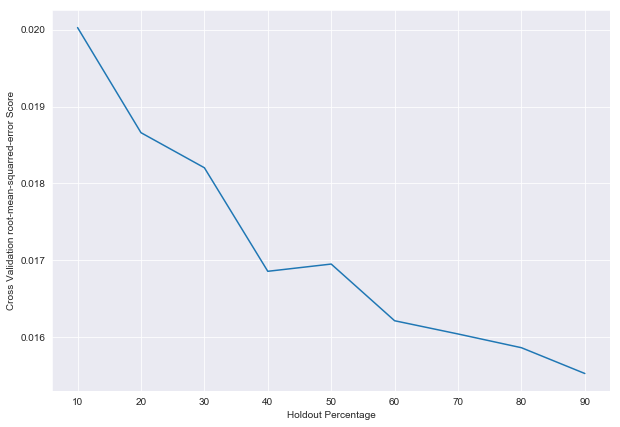

In [147]:
analysis(nj_2013, ['Violent Crime'])

intercept:  [0.01236098]
score:  0.11886692827192279
        Features     Coef
0  Violent Crime  3.44668


T-TESTS
Violent Crime
(-15.042894904550183, 8.61861057694255e-45, 736.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.014664862251621613
r squarred score: 0.3459090414356486
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.013700768389940495
r squarred score: 0.2810663836955454
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.01312287659950247
r squarred score: 0.20740094248172802
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.012633937930142124
r squarred score: 0.016114286593527427
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.01228422795134462
r squarred score: 0.05471641447426134
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.012007703130167842
r squarred score: 0.04683636122550339
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.01175342350

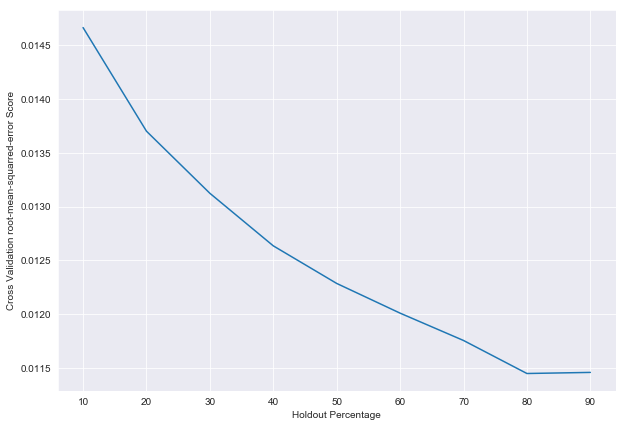

In [148]:
analysis(ny_2014, ['Violent Crime'])

intercept:  [0.01237906]
score:  0.2015168365278346
        Features      Coef
0  Violent Crime  2.234357


T-TESTS
Violent Crime
(-26.92158249172339, 2.5750185695048065e-133, 1704.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.013177923722487762
r squarred score: 0.28778867785643836
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.01277991347417882
r squarred score: 0.20726537944200818
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.012331565539191985
r squarred score: 0.1420955995041353
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.012132868513254895
r squarred score: 0.10988307594842794
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.011866548322282327
r squarred score: 0.17887309480488334
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.011791640531388346
r squarred score: 0.17065555402681243
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.011750

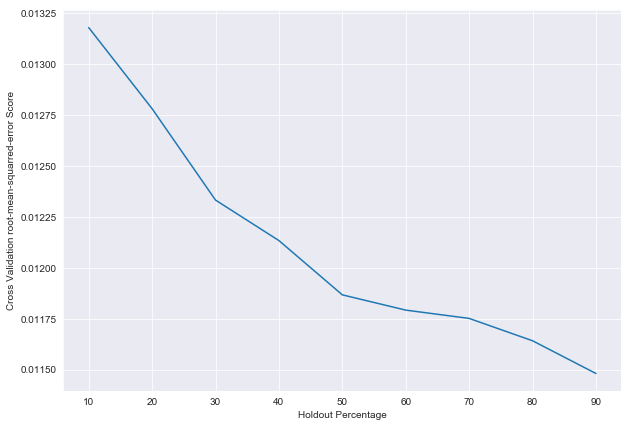

In [149]:
analysis(penn_2013, ['Violent Crime'])

intercept:  [0.01373691]
score:  0.2830175524894686
        Features      Coef
0  Violent Crime  3.745288


T-TESTS
Violent Crime
(-22.70514389515932, 8.912792885437256e-86, 694.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.012203199162645267
r squarred score: 0.32317005807190996
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.011971497059691447
r squarred score: 0.2704427037038335
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.011756286015734781
r squarred score: 0.1302704558907818
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.011531433006602162
r squarred score: 0.42150461833606445
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.011377260419589485
r squarred score: 0.24967677331407134
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.011254363351329018
r squarred score: 0.20822772614955998
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.011058899

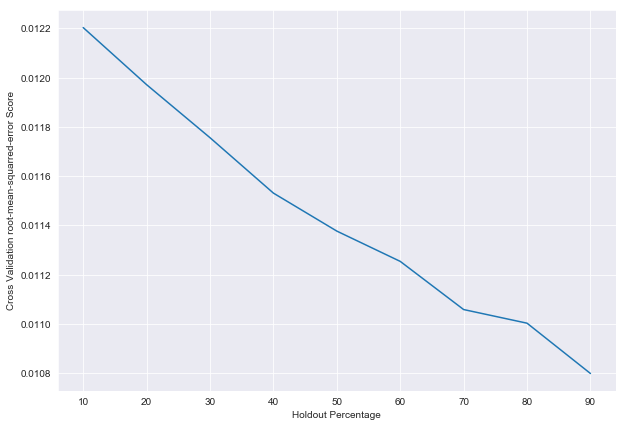

In [150]:
analysis(ny_2013, ['Violent Crime'])

intercept:  [0.01596459]
score:  0.20200041316379436
  Features      Coef
0     Rape  34.11599


T-TESTS
Rape
(-24.75893780458776, 1.771485537348608e-97, 694.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.012670348598360515
r squarred score: 0.24729043589608146
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.012504844028284565
r squarred score: 0.21694463797191899
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.012292431272999227
r squarred score: 0.07333775189603664
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.012051613632988355
r squarred score: 0.2985591587768467
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.011816366744835223
r squarred score: 0.2106028456711584
Hold out percentage: 50%

iteration: 6.0
root mean squared error: 0.011812308104358158
r squarred score: 0.11410501851667276
Hold out percentage: 60%

iteration: 7.0
root mean squared error: 0.011520733568253266
r squarred

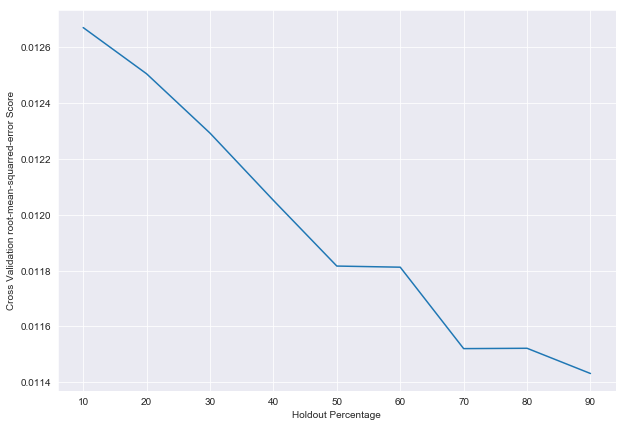

In [151]:
analysis(ny_2013, ['Rape'])

intercept:  [0.01365979]
score:  0.2715035254697957
                               Features       Coef
0  Murder and nonnegligent manslaughter -29.398880
1                    Aggrevated assault   5.892787


T-TESTS
Murder and nonnegligent manslaughter
(-24.878639228552135, 3.661837384954243e-98, 694.0)

Aggrevated assault
(-23.457215748846334, 4.757422109477334e-90, 694.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.012445036921073589
r squarred score: 0.22155820256240422
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.012193881229280685
r squarred score: -0.03446565825157211
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.012013373809811153
r squarred score: 0.30974098239703596
Hold out percentage: 30%

iteration: 4.0
root mean squared error: 0.011795028392749856
r squarred score: 0.20781505010638934
Hold out percentage: 40%

iteration: 5.0
root mean squared error: 0.011587939199122203
r squarred score: 0.28000877603089946
Hold

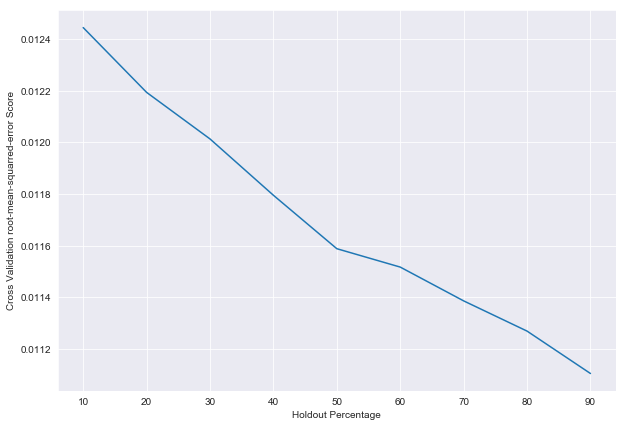

In [152]:
analysis(ny_2013, ['Murder and nonnegligent manslaughter','Aggrevated assault'])

intercept:  [0.01318675]
score:  0.32521132383967044
                               Features       Coef
0  Murder and nonnegligent manslaughter -59.900897
1                               Robbery   3.589003
2                    Aggrevated assault   3.578763
3                                  Rape  18.143833


T-TESTS
Murder and nonnegligent manslaughter
(-24.878639228552135, 3.661837384954243e-98, 694.0)

Robbery
(-24.382065034527937, 2.526576231433109e-95, 694.0)

Aggrevated assault
(-23.457215748846334, 4.757422109477334e-90, 694.0)

Rape
(-24.75893780458776, 1.771485537348608e-97, 694.0)



CROSS VALIDATION
iteration: 1.0
root mean squared error: 0.012049667524556681
r squarred score: 0.37001733959012906
Hold out percentage: 10%

iteration: 2.0
root mean squared error: 0.011738637352273314
r squarred score: 0.04448256853696375
Hold out percentage: 20%

iteration: 3.0
root mean squared error: 0.011516429108320937
r squarred score: 0.47454450225105405
Hold out percentage: 30%

iteratio

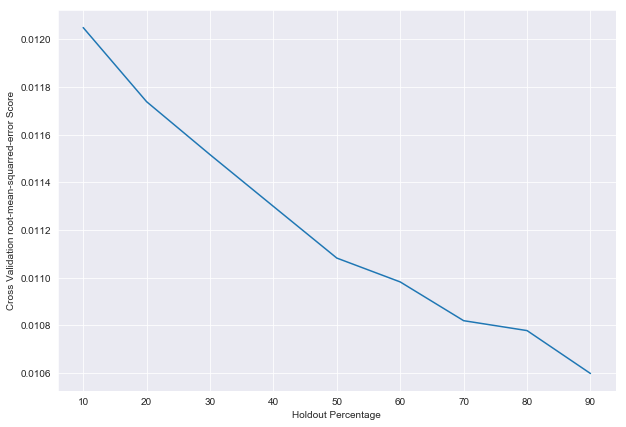

In [153]:
analysis(ny_2013, ['Murder and nonnegligent manslaughter', 'Robbery', 'Aggrevated assault', 'Rape'])

# Conclusion: 
Based on these findings, it appears the model only responds well with th cal_2013 dataset as it is the only model that regardless of holdout is able to account for the most varience. It is unclear why this is and if there is a better combination features or parameters that could explain property crime.  